# Module loading and preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# text related packages
import gensim
import spacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
# ML and DL packages
import sklearn
import keras
# no critical warnings, so we supress it
import warnings
warnings.simplefilter("ignore")
from gensim.models import TfidfModel

from tqdm import tqdm
import re, string
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer

import torch

In [2]:
!pip install transformers
!pip install shap
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 10.1 MB/s 
     |████████████████████████████████| 6.6 MB 52.7 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 596 kB 38.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 8.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 6.7 MB/s 
     |████████████████████████████████| 86 kB 7.2 MB/s 
     |████████████████████████████████| 212 kB 89.6 MB/s 
     |████████████████████████████████| 140 kB 45.6 MB/s 
     |████████████████████████████████

In [3]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertConfig
from transformers import AdamW, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab_Data/presidential_speeches_manual_labels.csv')
df_data.shape, display(df_data.head(10))

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL
0,1789-04-30,George Washington,Unaffiliated,Inaugural,First Inaugural Address,Washington calls on Congress to avoid local an...,Fellow Citizens of the Senate and the House of...,https://millercenter.org/the-presidency/presid...
1,1789-10-03,George Washington,Unaffiliated,NaN,Thanksgiving Proclamation,"At the request of Congress, Washington establi...",Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...
2,1790-01-08,George Washington,Unaffiliated,Congress,First Annual Message to Congress,"In a wide ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
3,1790-12-08,George Washington,Unaffiliated,Congress,Second Annual Message to Congress,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
4,1790-12-29,George Washington,Unaffiliated,Native,Talk to the Chiefs and Counselors of the Senec...,The President reassures the Seneca Nation that...,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...
5,1791-10-25,George Washington,Unaffiliated,Congress,Third Annual Message to Congress,Washington praises the success of the new bank...,"I meet you, upon the present occasion, with th...",https://millercenter.org/the-presidency/presid...
6,1792-04-05,George Washington,Unaffiliated,Veto,Veto Message on Congressional Redistricting,President Washington returns a congressional r...,Gentlemen of the House of Representatives: I h...,https://millercenter.org/the-presidency/presid...
7,1792-11-06,George Washington,Unaffiliated,Congress,Fourth Annual Message to Congress,NaN,"Fellow Citizens of the Senate, and of the Hous...",https://millercenter.org/the-presidency/presid...
8,1792-12-12,George Washington,Unaffiliated,Native,Proclamation Against Crimes Against the Cherok...,Offering a reward for the capture of American ...,"Whereas I have received authentic information,...",https://millercenter.org/the-presidency/presid...
9,1793-03-04,George Washington,Unaffiliated,Inaugural,Second Inaugural Address,"In a simple, brief speech, Washington expresse...",Fellow Citizens: I am again called upon by the...,https://millercenter.org/the-presidency/presid...


((992, 8), None)

In [6]:
df_data['President'].value_counts()

Lyndon B. Johnson        71
Ronald Reagan            59
Barack Obama             50
Franklin D. Roosevelt    49
John F. Kennedy          44
George W. Bush           39
Bill Clinton             39
Woodrow Wilson           33
Ulysses S. Grant         32
Andrew Johnson           31
Herbert Hoover           30
Grover Cleveland         30
Andrew Jackson           26
James K. Polk            25
Thomas Jefferson         24
Benjamin Harrison        23
Richard M. Nixon         23
George H. W. Bush        23
Jimmy Carter             22
James Madison            22
Theodore Roosevelt       22
George Washington        21
Donald Trump             19
Harry S. Truman          19
John Tyler               18
Warren G. Harding        18
Rutherford B. Hayes      16
Franklin Pierce          15
Abraham Lincoln          15
James Buchanan           14
William McKinley         14
Gerald Ford              14
William Taft             12
Calvin Coolidge          12
Chester A. Arthur        11
James Monroe        

In [7]:
df_data['Context'].value_counts()

Congress         154
FP               139
War              104
SOTU              59
Money             59
Inaugural         57
Policy            46
Veto              44
Convention        30
Press             28
University        26
Commemoration     26
Native            20
Protest           19
Campaign          18
Tragedy           18
Debate            13
UN                13
Farewell          10
Scandal            8
Proteest           1
Wwar               1
Campagin           1
Name: Context, dtype: int64

# Fine-tuning on context classification

In [ ]:
target_contexts = ['Congress','FP','War','SOTU','Money','Inaugural','Policy','Veto','Convention','Press','University','Commemoration','Native']

In [ ]:
df_context = df_data[df_data['Context'].isin(target_contexts)]
df_context.head()

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL
0,1789-04-30,George Washington,Unaffiliated,Inaugural,First Inaugural Address,Washington calls on Congress to avoid local an...,Fellow Citizens of the Senate and the House of...,https://millercenter.org/the-presidency/presid...
2,1790-01-08,George Washington,Unaffiliated,Congress,First Annual Message to Congress,"In a wide ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
3,1790-12-08,George Washington,Unaffiliated,Congress,Second Annual Message to Congress,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
4,1790-12-29,George Washington,Unaffiliated,Native,Talk to the Chiefs and Counselors of the Senec...,The President reassures the Seneca Nation that...,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...
5,1791-10-25,George Washington,Unaffiliated,Congress,Third Annual Message to Congress,Washington praises the success of the new bank...,"I meet you, upon the present occasion, with th...",https://millercenter.org/the-presidency/presid...


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_context["Context_code"] = lb_make.fit_transform(df_context["Context"])
df_context[["Context", "Context_code"]].sample(15)

,Context,Context_code
951,SOTU,9
287,Veto,11
416,Congress,1
88,FP,3
2,Congress,1
115,Congress,1
178,FP,3
497,FP,3
555,War,12
638,Press,8


In [ ]:
# Create sentence and label lists
sentences = df_context['Transcript'].values.astype(str)

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = df_context['Context_code'].values
sentences[1:5]

['[CLS] Fellow Citizens of the Senate and House of Representatives: I embrace with great satisfaction the opportunity which now presents itself, of congratulating you on the present favourable prospects of our public affairs. The recent accession of the important State of North Carolina to the Constitution of the United States ( of which official information has been received ); the rising credit and respectability of our Country; the general and increasing good will towards the Government of the Union, and the concord, peace, and plenty, with which we are blessed are circumstances auspicious in an eminent degree, to our national prosperity. In resuming your consultations for the general good, you can not but derive encouragement from the reflection that the measures of the last Session have been as satisfactory to your Constituents, as the novelty and difficulty of the work allowed you to hope. Still further to realize their expectations and to secure the blessings which a Gracious Pr

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenize the first sentence:


In [ ]:
df_context.shape

(792, 9)

In [ ]:
len(tokenized_texts)

792

In [ ]:
MAX_LEN = 256

In [ ]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2020, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2020, test_size=0.1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [ ]:
vocab_in_size = tokenizer.vocab_size
embedding_dim = 32
unit = 100
no_labels = len(np.unique(train_labels))
batch_size = 32
print(no_labels)

13


In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_in_size, embedding_dim, input_length=MAX_LEN))
model_lstm.add(LSTM(unit))
model_lstm.add(Dense(no_labels, activation='softmax'))
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 32)           976704    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 13)                1313      
                                                                 
Total params: 1,031,217
Trainable params: 1,031,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_inputs

array([[ 101, 1045, 2215, ..., 1996, 2034, 1997],
       [ 101, 2026, 3507, ..., 7044, 1010, 5391],
       [ 101, 2000, 1996, ..., 1999, 2256, 3361],
       ...,
       [ 101, 2720, 1012, ..., 2064, 2025, 8984],
       [ 101, 2000, 1996, ..., 1010, 1998, 8515],
       [ 101, 2026, 2406, ..., 2311, 1037, 2047]])

In [ ]:
history_lstm = model_lstm.fit(train_inputs, train_labels, 
                              epochs=10,batch_size=batch_size)

Epoch 1/10
23/23 [==============================] - 6s 13ms/step - loss: 2.4971 - accuracy: 0.1643
Epoch 2/10
23/23 [==============================] - 0s 13ms/step - loss: 2.3616 - accuracy: 0.1882
Epoch 3/10
23/23 [==============================] - 0s 13ms/step - loss: 2.3323 - accuracy: 0.1882
Epoch 4/10
23/23 [==============================] - 0s 13ms/step - loss: 2.2600 - accuracy: 0.1910
Epoch 5/10
23/23 [==============================] - 0s 13ms/step - loss: 2.0424 - accuracy: 0.2753
Epoch 6/10
23/23 [==============================] - 0s 13ms/step - loss: 1.8441 - accuracy: 0.3329
Epoch 7/10
23/23 [==============================] - 0s 13ms/step - loss: 1.7048 - accuracy: 0.4199
Epoch 8/10
23/23 [==============================] - 0s 13ms/step - loss: 1.5295 - accuracy: 0.5126
Epoch 9/10
23/23 [==============================] - 0s 13ms/step - loss: 1.3586 - accuracy: 0.5772
Epoch 10/10
23/23 [==============================] - 0s 13ms/step - loss: 1.1645 - accuracy: 0.6713


In [ ]:
score = model_lstm.evaluate(validation_inputs, validation_labels, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 2.842153549194336
Test accuracy: 0.17499999701976776


**BERT**

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(target_contexts), output_hidden_states=True)
model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]


In [ ]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 8

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 8 ========
Training...

  Average training loss: 2.43
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.28
  Validation took: 0:00:01

======== Epoch 2 / 8 ========
Training...

  Average training loss: 2.21
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.30
  Validation took: 0:00:01

======== Epoch 3 / 8 ========
Training...

  Average training loss: 2.02
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.50
  Validation took: 0:00:01

======== Epoch 4 / 8 ========
Training...

  Average training loss: 1.84
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.49
  Validation took: 0:00:01

======== Epoch 5 / 8 ========
Training...

  Average training loss: 1.67
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.50
  Validation took: 0:00:01

======== Epoch 6 / 8 ========
Training...

  Average training loss: 1.56
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 

In [ ]:
# For every sentence, take the embedding of the first element [CLS] of the final layer. Explanation of the indices:
# 1 - The model outputs a tuple, the first element contains the output of the model, the second the hidden states.
# -1 - The hidden states of the last layer.
# : - All elements in the batch (the sentences).
# 0 - First element of every sentence (including start and end tokens) -> [CLS] token.
#model2 = model.to('cpu')
#sentence_embs = model2(train_inputs[1:10])[1][-1][1, 0].detach().numpy()
#sentence_embs = model(train_inputs.to('cuda')[1:2])[1][-1][1, 0].detach().numpy()
#doc_emb = np.mean(sentence_embs, axis=0)

In [ ]:
model(input.to('cuda').unsqueeze(0))[0]

tensor([[-0.5199,  2.0897, -0.3443, -0.4946,  2.1866, -0.2272,  0.0573, -0.8465,
         -0.8157, -0.7424, -0.2036,  0.0283, -0.6535]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
# Create sentence and label lists
sentences_all = df_data['Transcript'].values.astype(str)

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences_all = ["[CLS] " + sentence + " [SEP]" for sentence in sentences_all]
sentences_all[1:5]

['[CLS] Whereas it is the duty of all Nations to acknowledge the providence of Almighty God, to obey his will, to be grateful for his benefits, and humbly to implore his protection and favor, and Whereas both Houses of Congress have by their joint Committee requested me “to recommend to the People of the United States a day of public thanks giving and prayer to be observed by acknowledging with grateful hearts the many signal favors of Almighty God, especially by affording them an opportunity peaceably to establish a form of government for their safety and happiness.” Now therefore I do recommend and assign Thursday the 26th day of November next to be devoted by the People of these States to the service of that great and glorious Being, who is the beneficent Author of all the good that was, that is, or that will be. That we may then all unite in rendering unto him our sincere and humble thanks, for his kind care and protection of the People of this country previous to their becoming a 

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts_all = [tokenizer.tokenize(sent) for sent in sentences_all]
#print ("Tokenize the first sentence:")


In [ ]:
MAX_LEN = 256

In [ ]:
input_ids_all = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts_all]

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Pad our input tokens
input_ids_all = pad_sequences(input_ids_all, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
doc_embs = [];
for input in torch.tensor(input_ids_all):
  doc_emb = model(input.to('cuda').unsqueeze(0))[1][-1][:, 0].detach().cpu().numpy()
  doc_embs.append(doc_emb)

In [ ]:
doc_embs = np.array(doc_embs).squeeze()

In [ ]:
doc_embs.shape

(992, 768)

In [ ]:
df_data['President']

0      George Washington
1      George Washington
2      George Washington
3      George Washington
4      George Washington
             ...        
987         Donald Trump
988         Donald Trump
989         Donald Trump
990         Donald Trump
991         Donald Trump
Name: President, Length: 992, dtype: object

In [ ]:
df_output = pd.DataFrame(doc_embs)
df_output.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.451562,0.426158,0.219816,-0.849718,0.281534,0.616315,0.737683,0.949295,-0.751766,-0.324895,...,0.047438,-0.555630,0.862819,0.687220,-0.158071,-0.515992,0.131474,0.103940,0.119401,0.587358
1,0.148645,0.417802,0.260301,-0.157755,0.703107,-0.139461,0.959897,1.703524,-0.110015,0.492383,...,0.336861,-0.254485,0.696151,-0.196855,-0.127989,-0.859045,0.890896,0.252092,0.317357,0.079760
2,0.135522,0.501134,0.182142,-0.306708,0.384374,0.175770,0.938393,1.707870,-0.877020,0.050283,...,0.001826,-0.258804,1.119001,0.638456,-0.012950,-0.382356,-0.209111,0.230742,-0.261033,0.473495
3,-0.018716,0.509902,0.142588,-0.342451,0.443129,0.449074,0.601397,1.513130,-0.406376,-0.062696,...,-0.237280,-0.325017,0.919529,0.884244,-0.258118,-0.329690,0.149616,0.158378,-0.203394,0.526076
4,-0.528598,0.817750,-0.300293,0.094070,-0.221678,0.630310,0.830652,1.221837,-1.133771,0.211068,...,0.680700,0.285704,0.425855,-0.282351,0.056721,-0.257504,0.786482,0.010725,0.248509,0.018024


In [ ]:
df_output['President'] = df_data['President']
df_output['Context'] = df_data['Context']

In [ ]:
df_output.to_csv('/content/drive/MyDrive/Colab_Data/context_Bert_embeddings.csv')

# Fine-tuning on president classification

---



In [ ]:
target_presidents = df_data['President'].value_counts().keys()[0:36]

In [ ]:
df_presidents = df_data[df_data['President'].isin(target_presidents)]
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_presidents["President_code"] = lb_make.fit_transform(df_presidents["President"])
df_presidents[["President", "President_code"]].sample(15)

,President,President_code
895,George W. Bush,12
374,William McKinley,33
321,Grover Cleveland,15
39,Thomas Jefferson,30
208,James Buchanan,18
32,Thomas Jefferson,30
335,Benjamin Harrison,4
520,Franklin D. Roosevelt,9
524,Franklin D. Roosevelt,9
716,Richard M. Nixon,26


In [ ]:
# Create sentence and label lists
sentences = df_presidents['Transcript'].values.astype(str)

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = df_presidents['President_code'].values
sentences[0:5]

['[CLS] Fellow Citizens of the Senate and the House of Representatives: Among the vicissitudes incident to life, no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the fourteenth day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years: a retreat which was rendered every day more necessary as well as more dear to me, by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my Country called me, being sufficient to awaken in the wisest and most experienced of her citizens, a distrustful scrutiny into his qualification, co

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

Tokenize the first sentence:
['[CLS]', 'fellow', 'citizens', 'of', 'the', 'senate', 'and', 'the', 'house', 'of', 'representatives', ':', 'among', 'the', 'vic', '##iss', '##itude', '##s', 'incident', 'to', 'life', ',', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'an', '##xie', '##ties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', 'fourteenth', 'day', 'of', 'the', 'present', 'month', '.', 'on', 'the', 'one', 'hand', ',', 'i', 'was', 'summoned', 'by', 'my', 'country', ',', 'whose', 'voice', 'i', 'can', 'never', 'hear', 'but', 'with', 've', '##ner', '##ation', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'i', 'had', 'chosen', 'with', 'the', 'fond', '##est', 'pre', '##di', '##le', '##ction', ',', 'and', ',', 'in', 'my', 'flat', '##tering', 'hopes', ',', 'with', 'an', 'im', '##mut', '##able', 'decision', ',', 'as', 'the', 'asylum', 'of', 'my', 'declining', 'years', ':', 

In [ ]:
MAX_LEN = 128

In [ ]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2020, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2020, test_size=0.1)

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(target_presidents), output_hidden_states=True)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]


In [ ]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 8

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 8 ========
Training...

  Average training loss: 3.57
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy: 0.05
  Validation took: 0:00:00

======== Epoch 2 / 8 ========
Training...

  Average training loss: 3.40
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy: 0.07
  Validation took: 0:00:00

======== Epoch 3 / 8 ========
Training...

  Average training loss: 3.18
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy: 0.08
  Validation took: 0:00:00

======== Epoch 4 / 8 ========
Training...

  Average training loss: 3.00
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy: 0.15
  Validation took: 0:00:00

======== Epoch 5 / 8 ========
Training...

  Average training loss: 2.85
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy: 0.15
  Validation took: 0:00:00

======== Epoch 6 / 8 ========
Training...

  Average training loss: 2.76
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy: 

In [ ]:
# Create sentence and label lists
sentences_all = df_data['Transcript'].values.astype(str)

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences_all = ["[CLS] " + sentence + " [SEP]" for sentence in sentences_all]
sentences_all[1:5]

['[CLS] Whereas it is the duty of all Nations to acknowledge the providence of Almighty God, to obey his will, to be grateful for his benefits, and humbly to implore his protection and favor, and Whereas both Houses of Congress have by their joint Committee requested me “to recommend to the People of the United States a day of public thanks giving and prayer to be observed by acknowledging with grateful hearts the many signal favors of Almighty God, especially by affording them an opportunity peaceably to establish a form of government for their safety and happiness.” Now therefore I do recommend and assign Thursday the 26th day of November next to be devoted by the People of these States to the service of that great and glorious Being, who is the beneficent Author of all the good that was, that is, or that will be. That we may then all unite in rendering unto him our sincere and humble thanks, for his kind care and protection of the People of this country previous to their becoming a 

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts_all = [tokenizer.tokenize(sent) for sent in sentences_all]
#print ("Tokenize the first sentence:")


In [ ]:
MAX_LEN = 256

In [ ]:
input_ids_all = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts_all]

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Pad our input tokens
input_ids_all = pad_sequences(input_ids_all, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
doc_embs = [];
for input in torch.tensor(input_ids_all):
  doc_emb = model(input.to('cuda').unsqueeze(0))[1][-1][:, 0].detach().cpu().numpy()
  doc_embs.append(doc_emb)

In [ ]:
doc_embs = np.array(doc_embs).squeeze()

In [ ]:
doc_embs.shape

(992, 768)

In [ ]:
df_output = pd.DataFrame(doc_embs)
df_output.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.181331,-0.216684,-0.544488,-0.611155,0.670200,0.629231,0.829572,0.180684,-0.267612,-0.071309,...,0.100735,-0.112465,-0.431345,1.446274,0.336069,-0.004548,-0.033097,-0.196469,-0.298374,0.180462
1,0.074482,0.135035,-0.603059,-0.522697,0.543611,0.218145,1.020101,0.287235,-0.566654,0.032984,...,0.455757,-0.267805,-0.432190,1.404181,0.237894,0.125117,0.001270,-0.188251,-0.279870,0.141353
2,0.283171,-0.249959,-0.780900,-0.150407,0.470510,0.340004,0.911824,-0.080889,-0.863540,0.062720,...,0.270336,-0.091620,-0.379478,1.577775,0.344026,-0.078891,-0.127875,-0.470203,-0.439464,0.299794
3,0.344816,-0.389006,-0.705545,-0.159734,0.578245,0.353758,0.805898,-0.022889,-0.491712,-0.055933,...,0.144765,0.065739,-0.359677,1.432768,0.427462,-0.017370,-0.162265,-0.322714,-0.382797,0.248158
4,0.331089,0.110525,-0.823918,-0.516313,0.540129,0.249331,0.792430,0.290042,-1.027863,0.433040,...,0.589245,-0.236477,-0.673222,1.248854,0.269982,0.206357,-0.327722,-0.396733,-0.249741,0.154946


In [ ]:
df_output['President'] = df_data['President']
df_output['Context'] = df_data['Context']

In [ ]:
df_output.to_csv('/content/drive/MyDrive/Colab_Data/president_Bert_embeddings.csv')

In [ ]:
df_output.head()

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,President,Context
0,0.181331,-0.216684,-0.544488,-0.611155,0.670200,0.629231,0.829572,0.180684,-0.267612,-0.071309,...,-0.431345,1.446274,0.336069,-0.004548,-0.033097,-0.196469,-0.298374,0.180462,George Washington,Inaugural
1,0.074482,0.135035,-0.603059,-0.522697,0.543611,0.218145,1.020101,0.287235,-0.566654,0.032984,...,-0.432190,1.404181,0.237894,0.125117,0.001270,-0.188251,-0.279870,0.141353,George Washington,NaN
2,0.283171,-0.249959,-0.780900,-0.150407,0.470510,0.340004,0.911824,-0.080889,-0.863540,0.062720,...,-0.379478,1.577775,0.344026,-0.078891,-0.127875,-0.470203,-0.439464,0.299794,George Washington,Congress
3,0.344816,-0.389006,-0.705545,-0.159734,0.578245,0.353758,0.805898,-0.022889,-0.491712,-0.055933,...,-0.359677,1.432768,0.427462,-0.017370,-0.162265,-0.322714,-0.382797,0.248158,George Washington,Congress
4,0.331089,0.110525,-0.823918,-0.516313,0.540129,0.249331,0.792430,0.290042,-1.027863,0.433040,...,-0.673222,1.248854,0.269982,0.206357,-0.327722,-0.396733,-0.249741,0.154946,George Washington,Native


In [ ]:
# For every sentence, take the embedding of the first element [CLS] of the final layer. Explanation of the indices:
# 1 - The model outputs a tuple, the first element contains the output of the model, the second the hidden states.
# -1 - The hidden states of the last layer.
# : - All elements in the batch (the sentences).
# 0 - First element of every sentence (including start and end tokens) -> [CLS] token.
#model2 = model.to('cpu')
#sentence_embs = model2(train_inputs)[1][-1][1, 0].detach().numpy()
#sentence_embs = model(train_inputs.to('cuda'))[1][-1][:, 0].detach().numpy()
#doc_emb = np.mean(sentence_embs, axis=0)

In [ ]:
doc_embs = [];
for input in torch.tensor(input_ids):
  doc_emb = model(input.to('cuda').unsqueeze(0))[1][-1][:, 0].detach().cpu().numpy()
  doc_embs.append(doc_emb)

In [ ]:
doc_embs = np.array(doc_embs).squeeze()

In [ ]:
doc_embs[0]

array([ 1.25403777e-01, -2.06423327e-01, -2.51642019e-01, -1.06659997e+00,
        2.00875610e-01,  9.03926492e-01,  6.17165267e-01, -2.02602550e-01,
       -6.30061209e-01,  1.40841901e-01, -1.31466817e-02, -5.91537178e-01,
       -8.02740812e-01, -1.00249374e+00, -1.46674323e+00,  5.36708057e-01,
        5.91188192e-01,  4.15254116e-01, -6.02979600e-01, -1.18361123e-01,
       -8.62162650e-01,  2.85209149e-01,  1.37461558e-01, -1.09597564e+00,
        4.32898641e-01, -8.10322836e-02, -3.76494169e-01,  2.57575035e-01,
       -4.14066315e-01, -4.66655374e-01,  1.80309221e-01,  1.21831439e-01,
        4.26085860e-01, -1.79905027e-01,  5.28081059e-01,  1.46109778e-02,
       -2.47391149e-01,  5.06352007e-01, -5.78476012e-01,  6.52496934e-01,
        1.63311228e-01, -6.13167346e-01, -6.83288157e-01, -1.02766192e+00,
        6.15682192e-02, -5.56538999e-02, -1.08770394e+00,  4.60110039e-01,
       -3.14246297e-01, -5.54387927e-01,  1.17043853e+00,  6.96198761e-01,
        2.62808502e-01,  

In [ ]:
import sklearn.manifold

In [ ]:
tsneDoc = sklearn.manifold.TSNE(n_components=2).fit_transform(doc_embs)

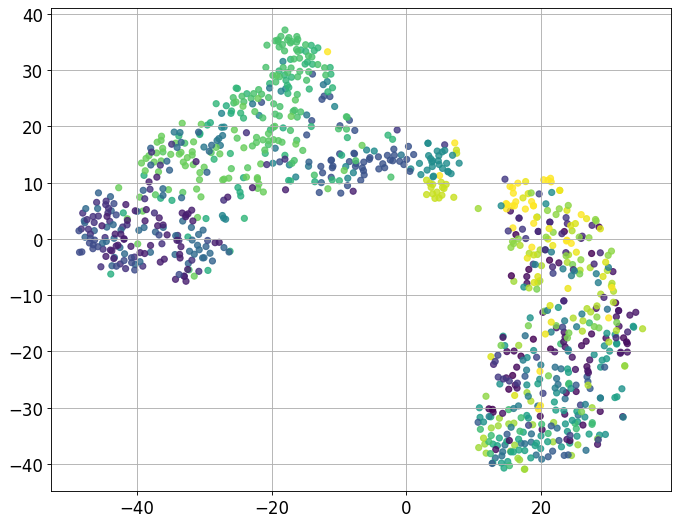

In [ ]:
# visualize the embedding
#plt.style.use(['nature', 'science', 'no-latex'])
#plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(tsneDoc[:, 0], tsneDoc[:, 1], c=labels, s=30, alpha=0.8, label=lb_make.inverse_transform(range(36)))
# plt.legend()
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Fine-tuning on president classification (limited to target presidents)

---



In [61]:
target_presidents = ['Jimmy Carter', 'Ronald Reagan', 'Bill Clinton', 'George H. W. Bush', 'George W. Bush', 'Richard M. Nixon', 'John F. Kennedy', 'Lyndon B. Johnson',  'Barack Obama', 'Franklin D. Roosevelt']

In [62]:
df_presidents = df_data[df_data['President'].isin(target_presidents)]
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_presidents["President_code"] = lb_make.fit_transform(df_presidents["President"])
df_presidents[["President", "President_code"]].sample(15)

,President,President_code
756,Jimmy Carter,5
832,George H. W. Bush,3
711,Richard M. Nixon,8
922,George W. Bush,4
906,George W. Bush,4
612,John F. Kennedy,6
757,Jimmy Carter,5
807,Ronald Reagan,9
544,Franklin D. Roosevelt,2
611,John F. Kennedy,6


In [63]:
# Create sentence and label lists
sentences = df_presidents['Transcript'].values.astype(str)

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = df_presidents['President_code'].values
sentences[0:5]

["[CLS] President Hoover, Mr. Chief Justice, my friends: This is a day of national consecration. And I am certain that on this day my fellow Americans expect that on my induction into the Presidency I will address them with a candor and a decision which the present situation of our people impels. This is preeminently the time to speak the truth, the whole truth, frankly and boldly. Nor need we shrink from honestly facing conditions in our country today. This great Nation will endure as it has endured, will revive and will prosper. So, first of all, let me assert my firm belief that the only thing we have to fear is fear itself, nameless, unreasoning, unjustified terror which paralyzes needed efforts to convert retreat into advance. In every dark hour of our national life a leadership of frankness and vigor has met with that understanding and support of the people themselves which is essential to victory. I am convinced that you will again give that support to leadership in these critic

In [64]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

Tokenize the first sentence:
['[CLS]', 'president', 'hoover', ',', 'mr', '.', 'chief', 'justice', ',', 'my', 'friends', ':', 'this', 'is', 'a', 'day', 'of', 'national', 'consecration', '.', 'and', 'i', 'am', 'certain', 'that', 'on', 'this', 'day', 'my', 'fellow', 'americans', 'expect', 'that', 'on', 'my', 'induction', 'into', 'the', 'presidency', 'i', 'will', 'address', 'them', 'with', 'a', 'can', '##dor', 'and', 'a', 'decision', 'which', 'the', 'present', 'situation', 'of', 'our', 'people', 'imp', '##els', '.', 'this', 'is', 'pre', '##emi', '##nent', '##ly', 'the', 'time', 'to', 'speak', 'the', 'truth', ',', 'the', 'whole', 'truth', ',', 'frankly', 'and', 'bold', '##ly', '.', 'nor', 'need', 'we', 'shrink', 'from', 'honestly', 'facing', 'conditions', 'in', 'our', 'country', 'today', '.', 'this', 'great', 'nation', 'will', 'endure', 'as', 'it', 'has', 'endured', ',', 'will', 'revive', 'and', 'will', 'pro', '##sper', '.', 'so', ',', 'first', 'of', 'all', ',', 'let', 'me', 'assert', 'my',

In [65]:
MAX_LEN = 256

In [66]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [67]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.sequence import pad_sequences

In [68]:
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [69]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2020, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2020, test_size=0.1)

In [70]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [71]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [72]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(target_presidents), output_hidden_states=True)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [73]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]


In [74]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [75]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 12

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [76]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [77]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [78]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')

In [79]:
train_loss_history = []
valid_accuracy_history = []

In [80]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
    train_loss_history.append(avg_train_loss)
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    valid_accuracy_history.append(eval_accuracy/nb_eval_steps)

print("")
print("Training complete!")


======== Epoch 1 / 12 ========
Training...

  Average training loss: 2.30
  Training epcoh took: 0:00:09

Running Validation...
  Accuracy: 0.11
  Validation took: 0:00:00

======== Epoch 2 / 12 ========
Training...

  Average training loss: 2.22
  Training epcoh took: 0:00:09

Running Validation...
  Accuracy: 0.19
  Validation took: 0:00:00

======== Epoch 3 / 12 ========
Training...

  Average training loss: 2.17
  Training epcoh took: 0:00:09

Running Validation...
  Accuracy: 0.34
  Validation took: 0:00:00

======== Epoch 4 / 12 ========
Training...

  Average training loss: 2.06
  Training epcoh took: 0:00:09

Running Validation...
  Accuracy: 0.27
  Validation took: 0:00:00

======== Epoch 5 / 12 ========
Training...

  Average training loss: 1.93
  Training epcoh took: 0:00:09

Running Validation...
  Accuracy: 0.35
  Validation took: 0:00:00

======== Epoch 6 / 12 ========
Training...

  Average training loss: 1.82
  Training epcoh took: 0:00:09

Running Validation...
  Accu

In [81]:
# Create sentence and label lists
sentences_all = df_data['Transcript'].values.astype(str)

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences_all = ["[CLS] " + sentence + " [SEP]" for sentence in sentences_all]
sentences_all[1:5]

['[CLS] Whereas it is the duty of all Nations to acknowledge the providence of Almighty God, to obey his will, to be grateful for his benefits, and humbly to implore his protection and favor, and Whereas both Houses of Congress have by their joint Committee requested me “to recommend to the People of the United States a day of public thanks giving and prayer to be observed by acknowledging with grateful hearts the many signal favors of Almighty God, especially by affording them an opportunity peaceably to establish a form of government for their safety and happiness.” Now therefore I do recommend and assign Thursday the 26th day of November next to be devoted by the People of these States to the service of that great and glorious Being, who is the beneficent Author of all the good that was, that is, or that will be. That we may then all unite in rendering unto him our sincere and humble thanks, for his kind care and protection of the People of this country previous to their becoming a 

In [82]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts_all = [tokenizer.tokenize(sent) for sent in sentences_all]
#print ("Tokenize the first sentence:")


In [83]:
MAX_LEN = 256

In [84]:
input_ids_all = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts_all]

In [85]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.sequence import pad_sequences

In [86]:
# Pad our input tokens
input_ids_all = pad_sequences(input_ids_all, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [87]:
doc_embs = [];
for input in torch.tensor(input_ids_all):
  doc_emb = model(input.to('cuda').unsqueeze(0))[1][-1][:, 0].detach().cpu().numpy()
  doc_embs.append(doc_emb)

In [88]:
doc_embs = np.array(doc_embs).squeeze()

In [89]:
doc_embs.shape

(992, 768)

In [90]:
df_output = pd.DataFrame(doc_embs)
df_output.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.225608,0.134628,0.011958,-0.750868,0.847893,-0.004564,0.080744,1.299563,0.175617,-0.921154,...,0.042820,0.313875,0.401768,-0.069190,0.083071,-0.674929,0.158936,-0.338947,-0.655183,-0.015086
1,-0.196589,0.235875,0.025348,-0.507717,0.902635,-0.343642,0.059299,1.270051,0.369012,-0.763749,...,0.390736,0.389537,0.256512,-0.427997,0.170196,-0.647425,-0.012111,-0.273952,-0.534087,-0.207896
2,-0.070117,0.214790,0.102493,-0.561116,0.861217,-0.338162,-0.054160,1.139221,0.274687,-0.867640,...,0.344234,0.535642,0.424232,-0.293374,0.028395,-0.784245,0.013376,-0.297028,-0.758353,-0.061003
3,-0.049027,0.171143,0.115484,-0.574336,0.930125,-0.257127,-0.156351,1.279833,0.345420,-0.840599,...,0.217072,0.553153,0.291129,-0.330277,0.045810,-0.795542,0.125990,-0.224554,-0.672445,-0.030067
4,-0.041562,0.193170,-0.188005,-0.693327,0.913422,-0.459325,-0.101831,1.065758,0.326904,-0.621377,...,0.484128,0.748894,0.191735,-0.505038,0.110725,-0.361317,-0.187411,-0.208453,-0.666705,-0.026449


In [91]:
df_output['President'] = df_data['President']
df_output['Context'] = df_data['Context']

In [92]:
df_output.to_csv('/content/drive/MyDrive/Colab_Data/president_Bert_embeddings_2.csv')

In [93]:
df_output.head()

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,President,Context
0,-0.225608,0.134628,0.011958,-0.750868,0.847893,-0.004564,0.080744,1.299563,0.175617,-0.921154,...,0.401768,-0.069190,0.083071,-0.674929,0.158936,-0.338947,-0.655183,-0.015086,George Washington,Inaugural
1,-0.196589,0.235875,0.025348,-0.507717,0.902635,-0.343642,0.059299,1.270051,0.369012,-0.763749,...,0.256512,-0.427997,0.170196,-0.647425,-0.012111,-0.273952,-0.534087,-0.207896,George Washington,NaN
2,-0.070117,0.214790,0.102493,-0.561116,0.861217,-0.338162,-0.054160,1.139221,0.274687,-0.867640,...,0.424232,-0.293374,0.028395,-0.784245,0.013376,-0.297028,-0.758353,-0.061003,George Washington,Congress
3,-0.049027,0.171143,0.115484,-0.574336,0.930125,-0.257127,-0.156351,1.279833,0.345420,-0.840599,...,0.291129,-0.330277,0.045810,-0.795542,0.125990,-0.224554,-0.672445,-0.030067,George Washington,Congress
4,-0.041562,0.193170,-0.188005,-0.693327,0.913422,-0.459325,-0.101831,1.065758,0.326904,-0.621377,...,0.191735,-0.505038,0.110725,-0.361317,-0.187411,-0.208453,-0.666705,-0.026449,George Washington,Native


In [94]:
import matplotlib.pyplot as plt

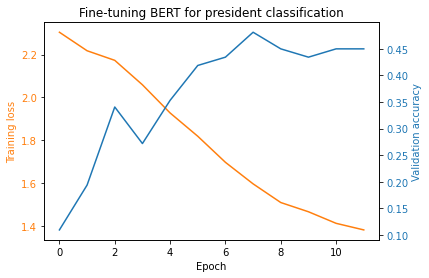

In [98]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 
  
# Define Data

x = np.arange(0, 15, 0.2)
data_1 = np.sin(x)
data_2 = np.cos(x) 
  
# Create Plot

fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Training loss', color = 'tab:orange') 
ax1.plot(train_loss_history, color = 'tab:orange') 
ax1.tick_params(axis ='y', labelcolor = 'tab:orange') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Validation accuracy', color = 'tab:blue') 
ax2.plot(valid_accuracy_history, color = 'tab:blue') 
ax2.tick_params(axis ='y', labelcolor = 'tab:blue') 

# Show plot
plt.title('Fine-tuning BERT for president classification')

plt.show()


In [99]:
import sklearn.manifold

In [100]:
tsneDoc = sklearn.manifold.TSNE(n_components=2).fit_transform(doc_embs)

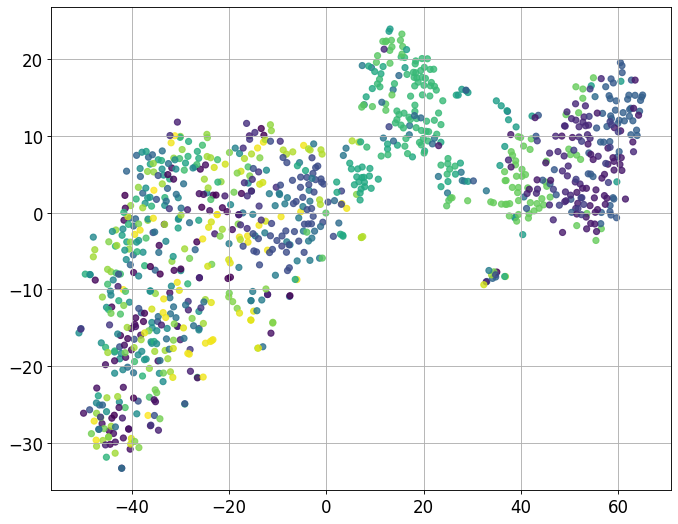

In [104]:
# visualize the embedding
#plt.style.use(['nature', 'science', 'no-latex'])
#plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(tsneDoc[:, 0], tsneDoc[:, 1], c=lb_make.fit_transform(df_output["President"]), s=30, alpha=0.8, label=lb_make.inverse_transform(range(10)))
# plt.legend()
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()